In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots
import shap

import events_package.utils as utils
from events_package.Experiment import Experiment
from events_package.config import FIVE_LAYERS

All single particle data has format of small windows in different layers of calorimeters, centered around highest energy cell. The included layers are:
presampler, ECAL 1, ECAL 2, ECAL3, HCAL 1. The data is in the barrel region. The sizes of windows in each layer are shown in cell below:

In [2]:
FIVE_LAYERS.dimensions

{'psb': (7, 9),
 'emb1': (3, 17),
 'emb2': (7, 9),
 'emb3': (7, 9),
 'hab1': (7, 9)}

# Electrons Data

In [3]:
# importing data
dataset_df = pd.read_parquet(
    r"C:\Users\User1\Desktop\MSci_Project\Data\6_data\Electron\Parquet\1m_electron_pq_3"
)

electrons = Experiment(dataset_df, config=FIVE_LAYERS)
del dataset_df
electrons.length

444840

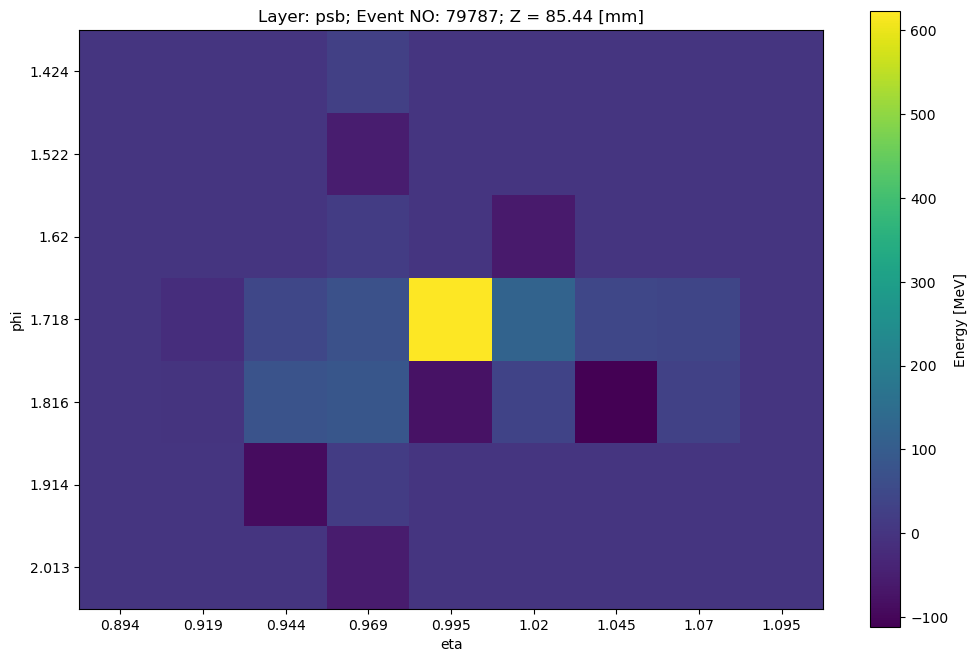

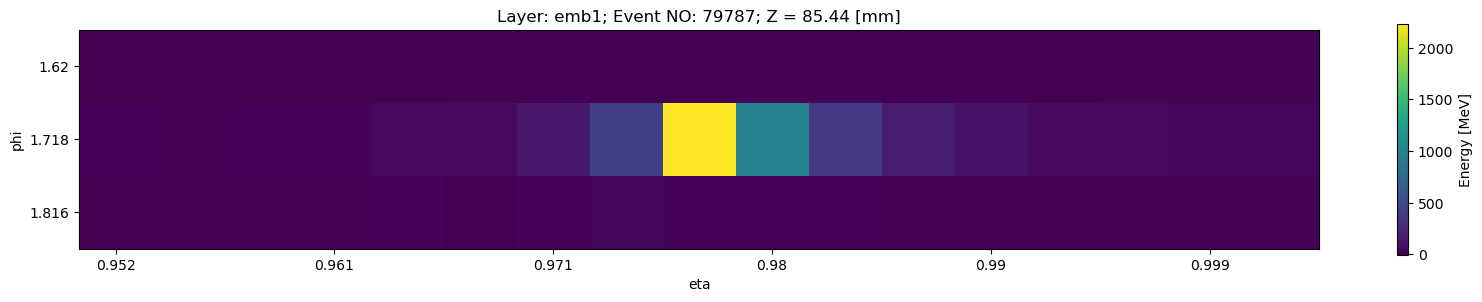

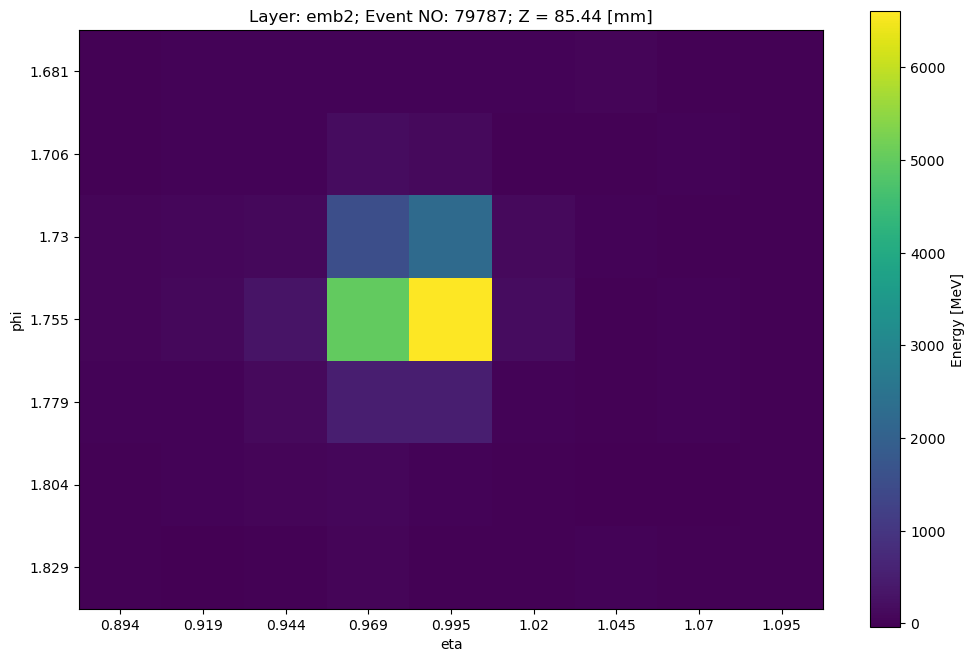

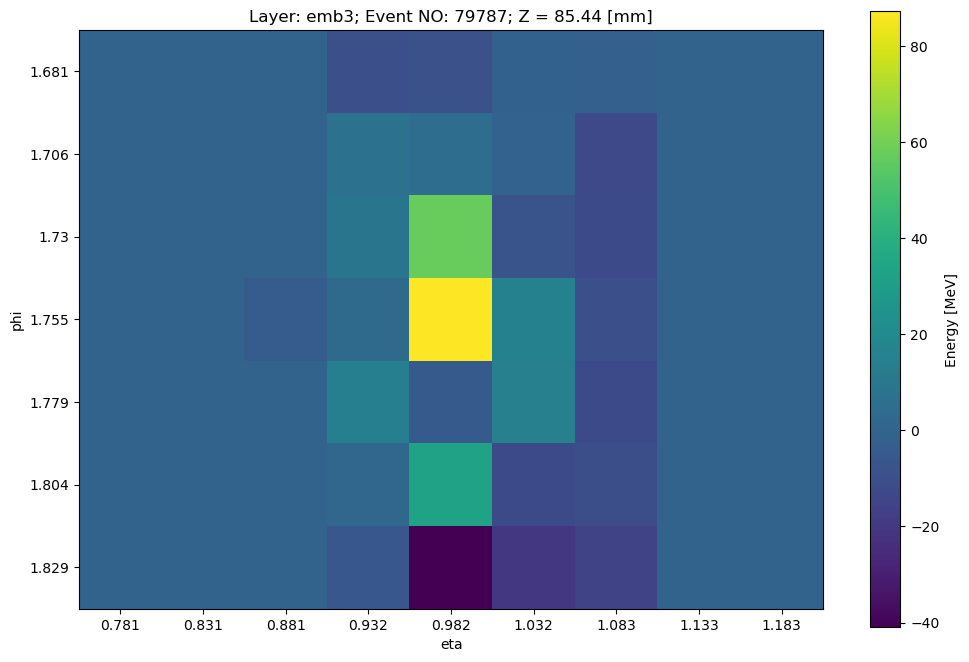

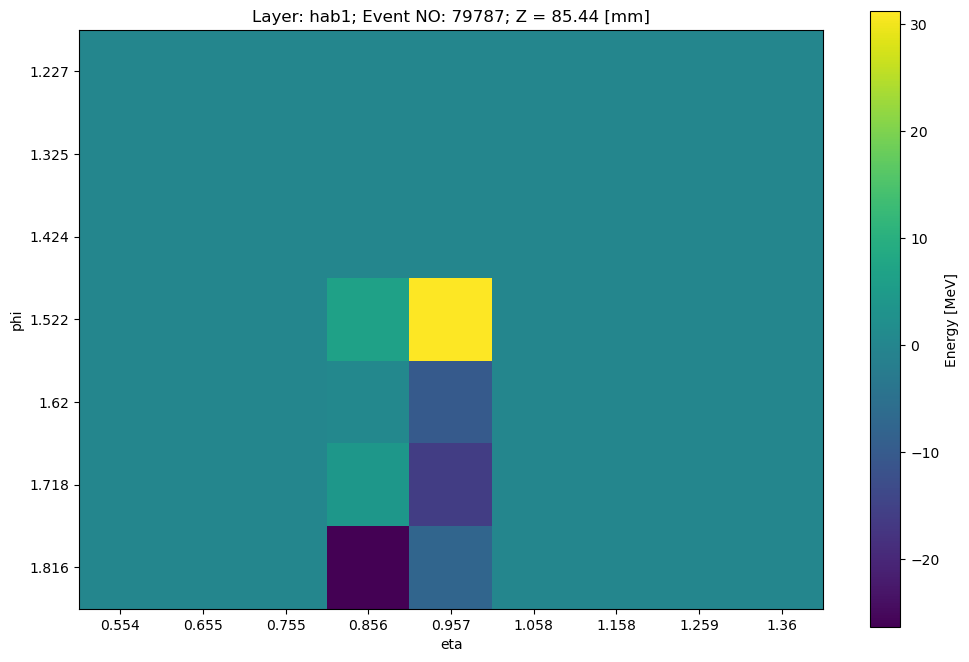

In [4]:
electrons.remove_duplicates()

# example plots before removing noise:
ix = 10
electrons.plot_psb(ix)
electrons.plot_emb1(ix)
electrons.plot_emb2(ix)
electrons.plot_emb3(ix)
electrons.plot_hab1(ix)

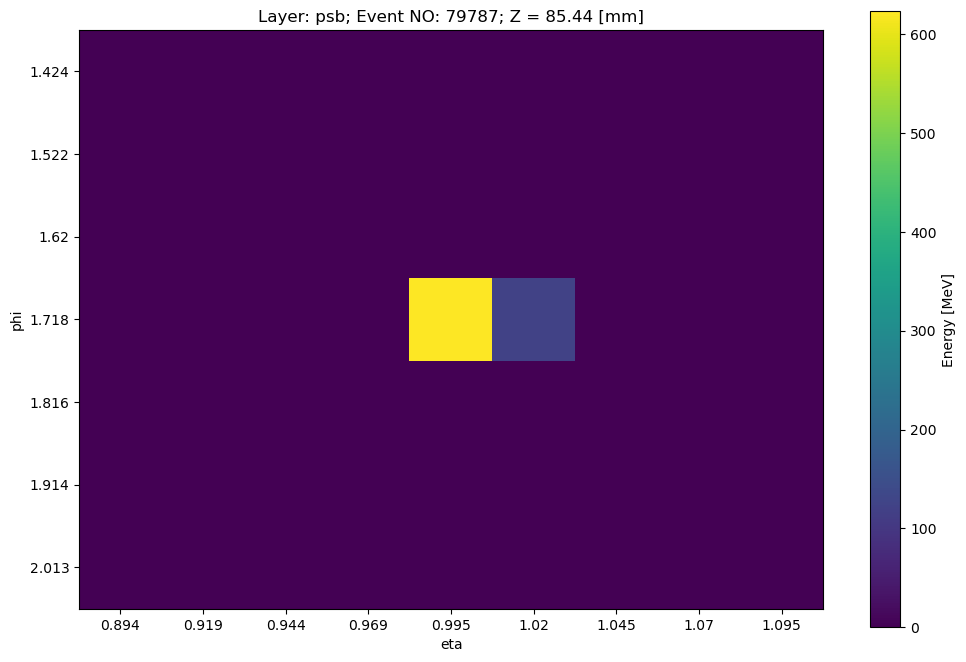

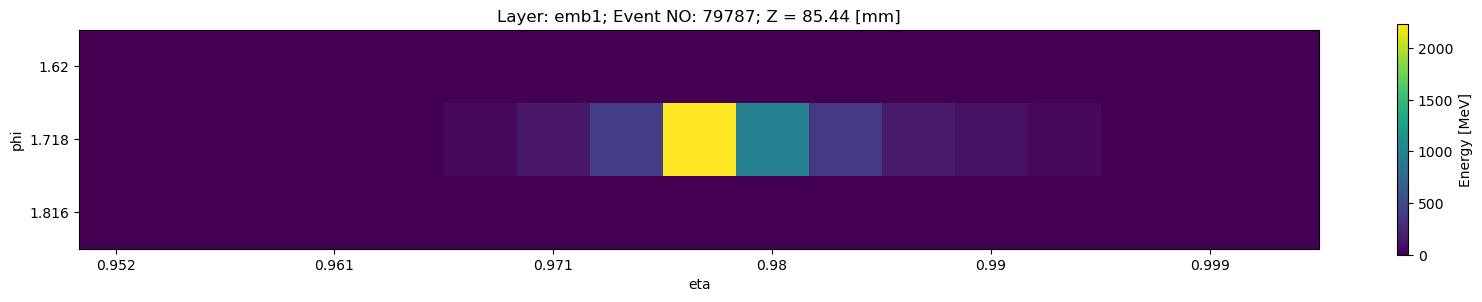

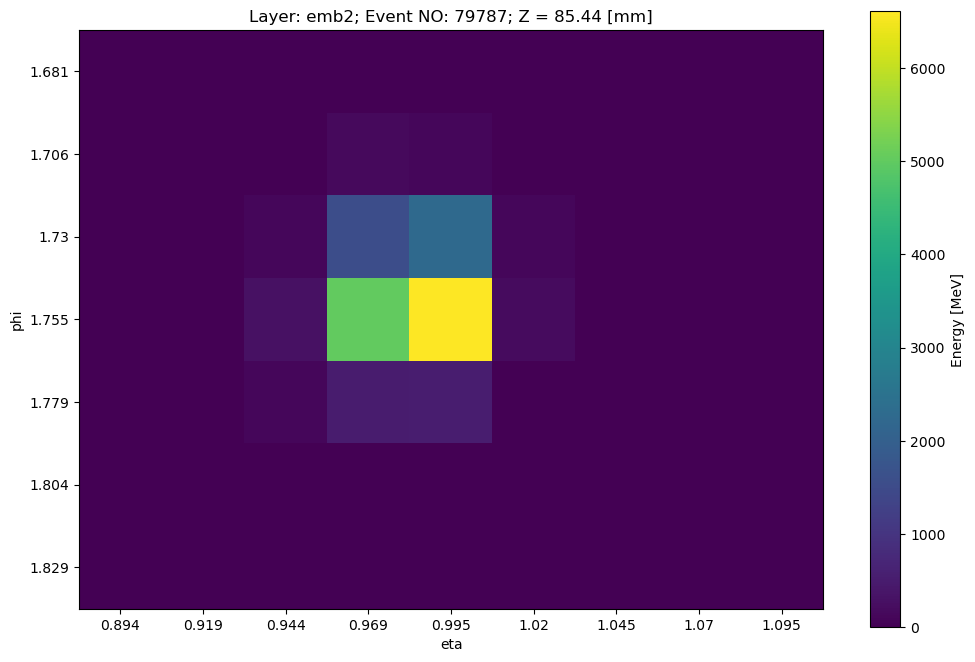

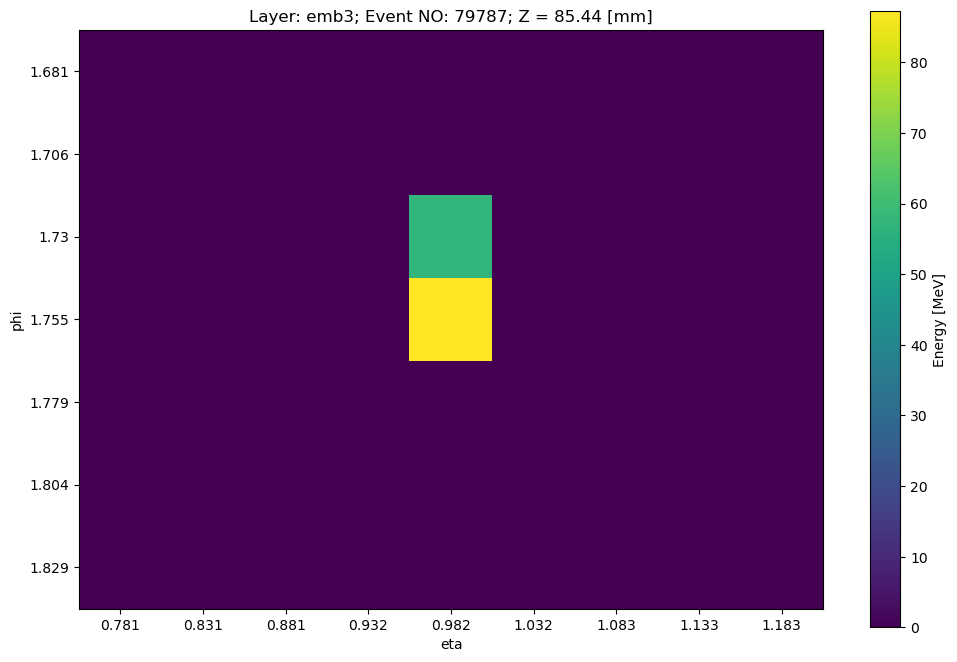

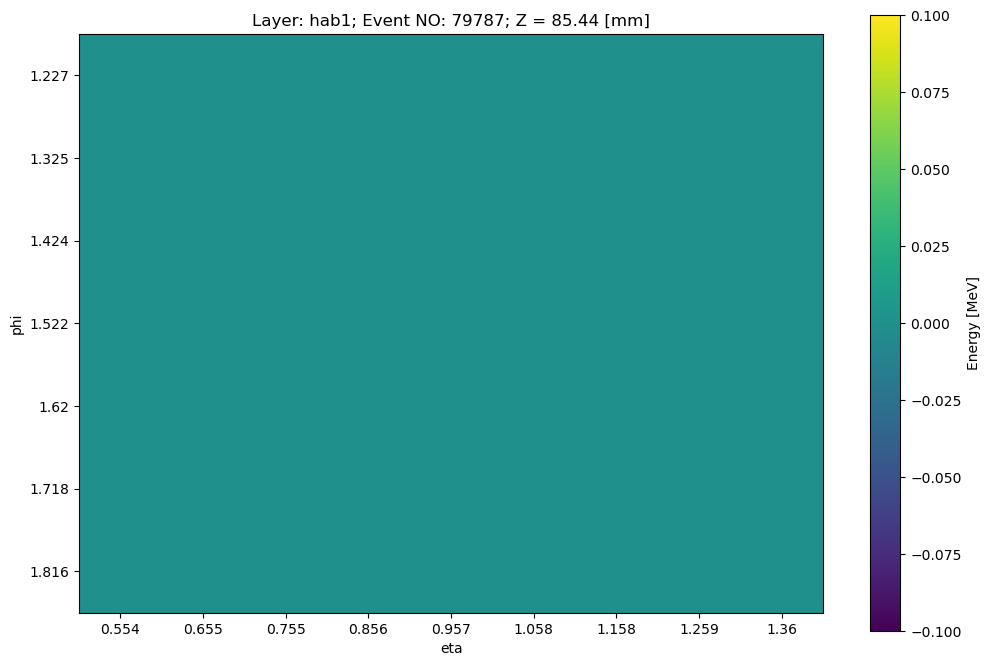

434998

In [5]:
electrons.denoisify()
# example plots before removing noise:
ix = 10
electrons.plot_psb(ix)
electrons.plot_emb1(ix)
electrons.plot_emb2(ix)
electrons.plot_emb3(ix)
electrons.plot_hab1(ix)

electrons.shuffle_dataset(repeats=11)
electrons.length

In [6]:
# remove events where after denoisifying, there is 0 total energy in layers
mask = electrons.tot_layers_et() > 0
electrons.remove_events(mask=mask)
electrons.length

434998

# Photon Data

In [7]:
dataset_df = pd.read_parquet(
    r"C:\Users\User1\Desktop\MSci_Project\Data\6_data\Photon\Parquet\1m_photon_pq"
)

photons = Experiment(dataset_df, config=FIVE_LAYERS)
del dataset_df
photons.length

444142

In [8]:
photons.remove_duplicates()
photons.denoisify()
photons.shuffle_dataset(repeats=11)
photons.length

434870

In [9]:
# remove events where after denoisifying, there is 0 total energy in layers
mask = photons.tot_layers_et() > 0
photons.remove_events(mask=mask)
photons.length

434870

# Pi0 Data

In [10]:
dataset_df = pd.read_parquet(
    r"C:\Users\User1\Desktop\MSci_Project\Data\6_data\PiZero\Parquet\pq_pi0_2"
)

pi0 = Experiment(dataset_df, config=FIVE_LAYERS)
del dataset_df
pi0.length

412856

In [11]:
pi0.remove_duplicates()
pi0.denoisify()
pi0.shuffle_dataset(repeats=11)
pi0.length

391483

In [12]:
# remove events where after denoisifying, there is 0 total energy in layers
mask = pi0.tot_layers_et() > 0
pi0.remove_events(mask=mask)
pi0.length

391483

# Pi Charged Data

In [13]:
dataset_df = pd.read_parquet(
    r"C:\Users\User1\Desktop\MSci_Project\Data\6_data\PiPlusMinus\Parquet\pq_piplusminus_2"
)

pi_char = Experiment(dataset_df, config=FIVE_LAYERS)
del dataset_df
pi_char.length

357554

In [14]:
pi_char.remove_duplicates()
pi_char.denoisify()
pi_char.shuffle_dataset(repeats=11)
pi_char.length

330809

In [15]:
# remove events where after denoisifying, there is 0 total energy in layers
mask = pi_char.tot_layers_et() > 0
pi_char.remove_events(mask=mask)
pi_char.length

330803

# Distributions in Data

## 1. Energy Left in Calorimeters / True Energy

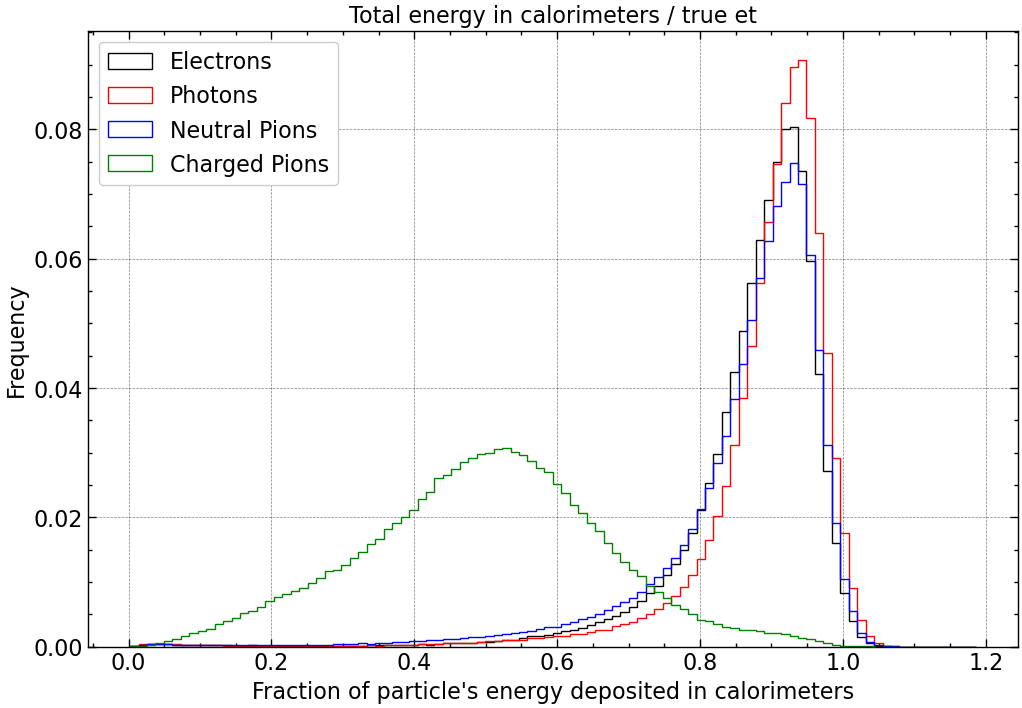

In [16]:
data1 = electrons.tot_layers_et() / electrons.et
data2 = photons.tot_layers_et() / photons.et
data3 = pi0.tot_layers_et() / pi0.et
data4 = pi_char.tot_layers_et() / pi_char.et

# Compute the min and max values for bin edges across all datasets
min_value = min(np.min(data1), np.min(data2), np.min(data3), np.min(data4))
max_value = max(np.max(data1), np.max(data2), np.max(data3), np.max(data4))

# Define the number of bins
num_bins = 100
bin_edges = np.linspace(min_value, max_value, num_bins + 1)

# Calculate histograms manually and normalize by the total number of occurrences
hist1, _ = np.histogram(data1, bins=bin_edges)
hist2, _ = np.histogram(data2, bins=bin_edges)
hist3, _ = np.histogram(data3, bins=bin_edges)
hist4, _ = np.histogram(data4, bins=bin_edges)

total_occurrences1 = len(data1)
total_occurrences2 = len(data2)
total_occurrences3 = len(data3)
total_occurrences4 = len(data4)

hist_normalized1 = hist1 / total_occurrences1
hist_normalized2 = hist2 / total_occurrences2
hist_normalized3 = hist3 / total_occurrences3
hist_normalized4 = hist4 / total_occurrences4


with plt.style.context(["science", "notebook", "grid"]):
    plt.figure(figsize=(12, 8))
    plt.hist(
        bin_edges[:-1],
        bins=bin_edges,
        weights=hist_normalized1,
        histtype="step",
        label="Electrons",
        # linestyle="dashed",
        color="k",
    )
    plt.hist(
        bin_edges[:-1],
        bins=bin_edges,
        weights=hist_normalized2,
        histtype="step",
        label="Photons",
        # linestyle="dashed",
        color="r",
    )
    plt.hist(
        bin_edges[:-1],
        bins=bin_edges,
        weights=hist_normalized3,
        histtype="step",
        label="Neutral Pions",
        # linestyle="dashed",
        color="b",
    )
    plt.hist(
        bin_edges[:-1],
        bins=bin_edges,
        weights=hist_normalized4,
        histtype="step",
        label="Charged Pions",
        # linestyle="dashed",
        color="g",
    )
    # Set labels and title
    plt.xlabel("Fraction of particle's energy deposited in calorimeters")
    plt.ylabel("Frequency")
    plt.title("Total energy in calorimeters / true et")

    # Add legend
    plt.legend()

    # Show plot
    plt.show()

## 2. Z distribution 

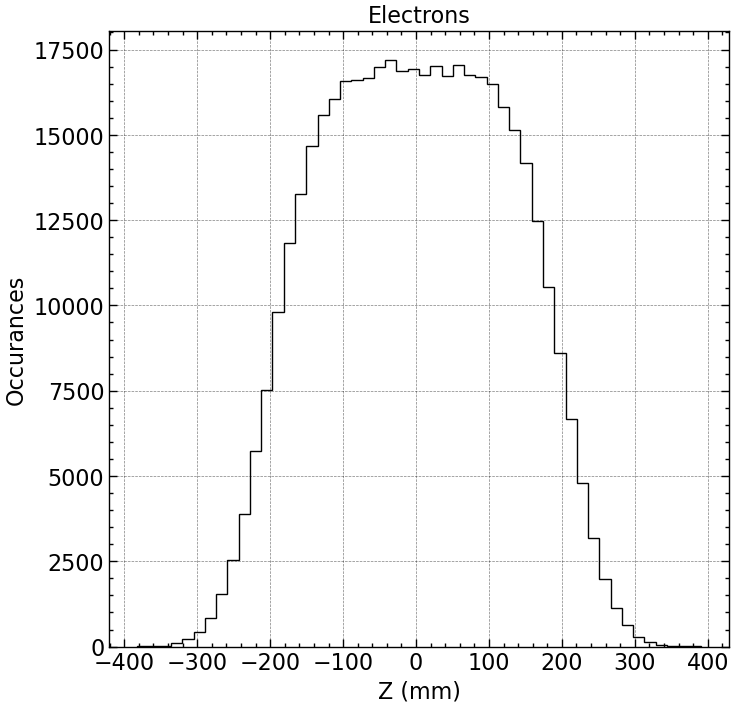

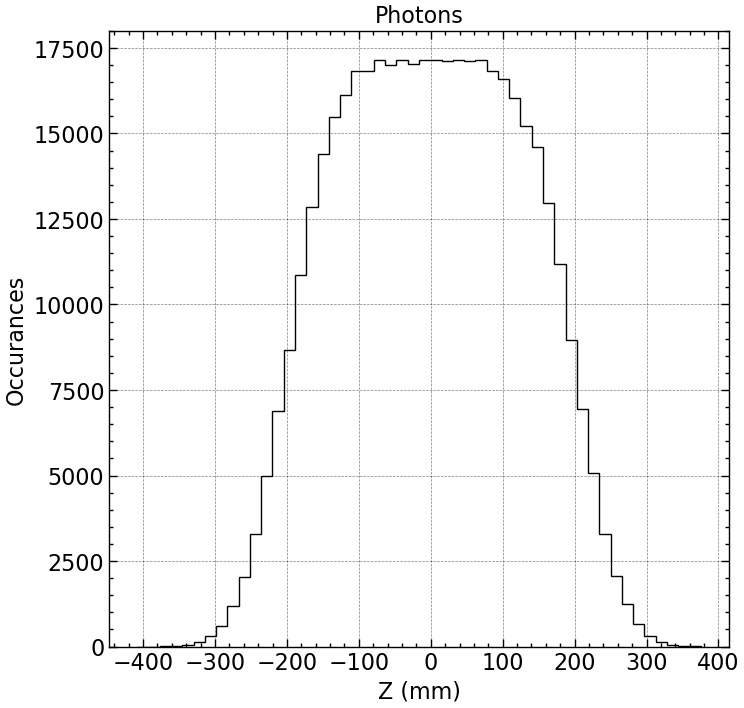

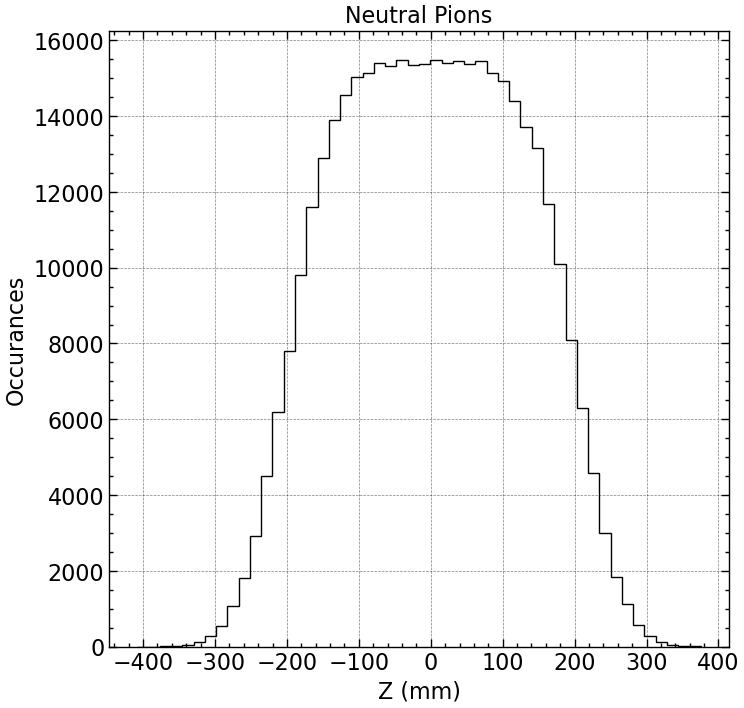

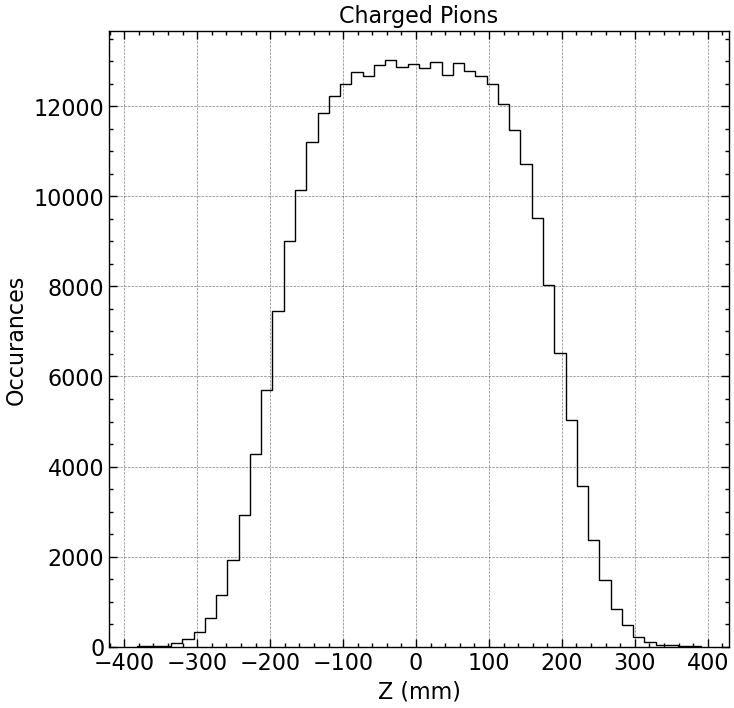

In [17]:
with plt.style.context(["science", "notebook", "grid"]):
    plt.figure(figsize=(8, 8))
    plt.hist(
        electrons.z,
        bins=50,
        histtype="step",
        label="Electrons",
        color="k",
        density=False,
    )
    plt.xlabel("Z (mm)")
    plt.ylabel("Occurances")
    plt.title("Electrons")
    plt.show()


with plt.style.context(["science", "notebook", "grid"]):
    plt.figure(figsize=(8, 8))
    plt.hist(
        photons.z,
        bins=50,
        histtype="step",
        label="Electrons",
        color="k",
        density=False,
    )
    plt.xlabel("Z (mm)")
    plt.ylabel("Occurances")
    plt.title("Photons")
    plt.show()

with plt.style.context(["science", "notebook", "grid"]):
    plt.figure(figsize=(8, 8))
    plt.hist(
        pi0.z,
        bins=50,
        histtype="step",
        label="Electrons",
        color="k",
        density=False,
    )
    plt.xlabel("Z (mm)")
    plt.ylabel("Occurances")
    plt.title("Neutral Pions")
    plt.show()

with plt.style.context(["science", "notebook", "grid"]):
    plt.figure(figsize=(8, 8))
    plt.hist(
        pi_char.z,
        bins=50,
        histtype="step",
        label="Electrons",
        color="k",
        density=False,
    )
    plt.xlabel("Z (mm)")
    plt.ylabel("Occurances")
    plt.title("Charged Pions")
    plt.show()

## 3. Pt Distribution

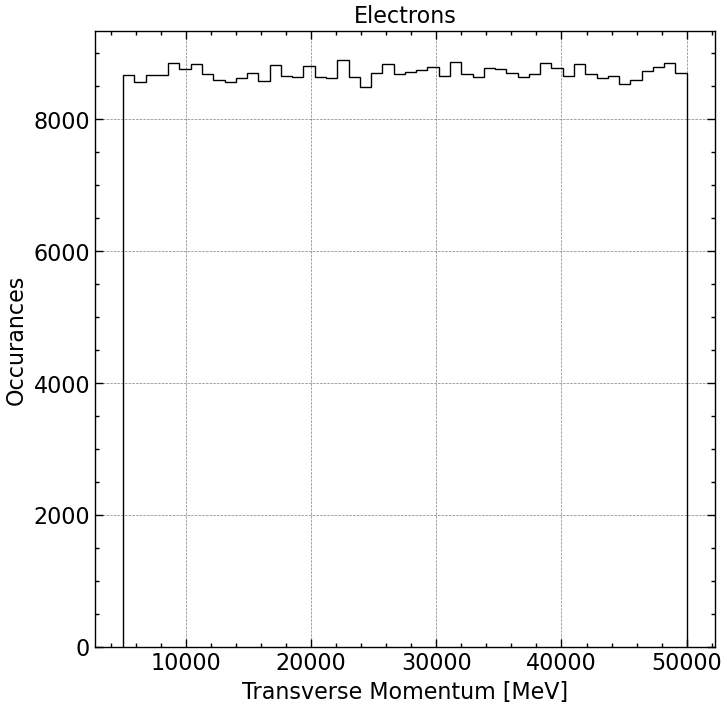

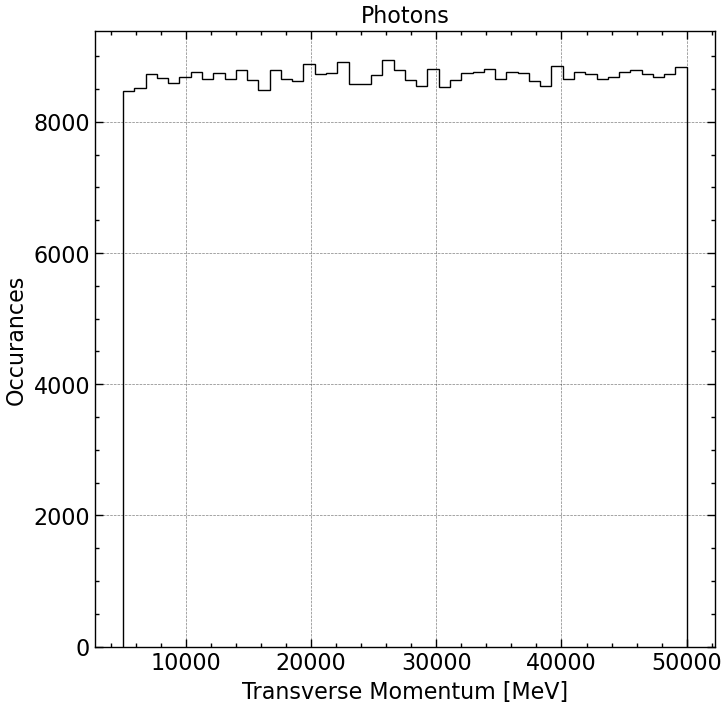

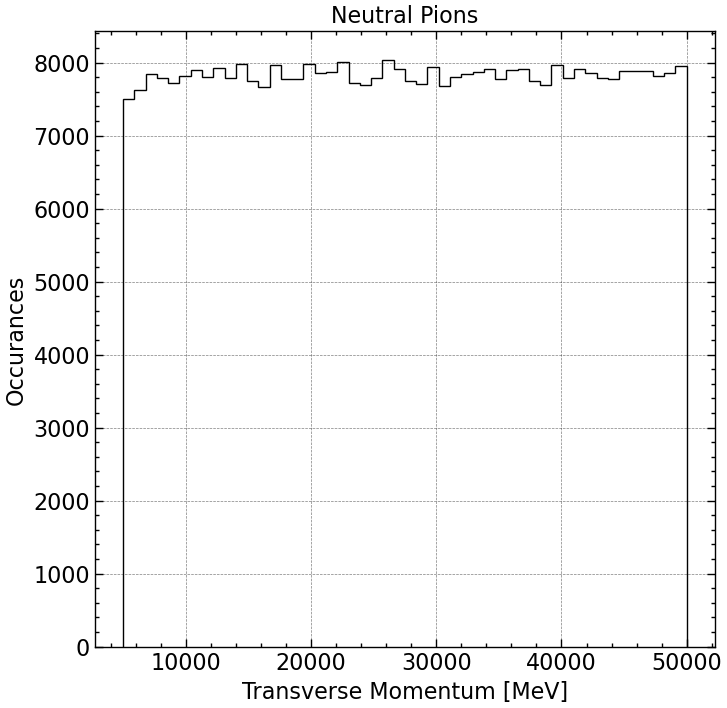

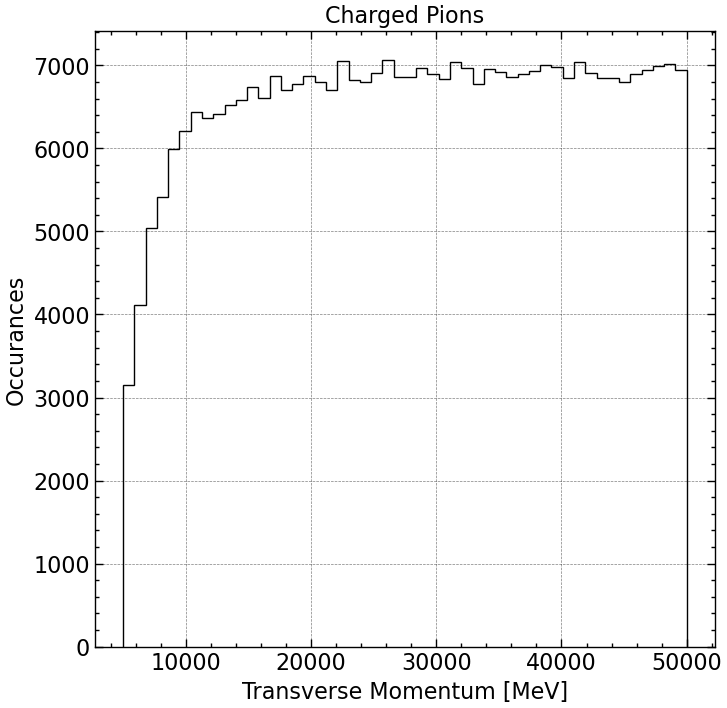

In [18]:
with plt.style.context(["science", "notebook", "grid"]):
    plt.figure(figsize=(8, 8))
    plt.hist(
        electrons.et,
        bins=50,
        histtype="step",
        label="Electrons",
        color="k",
        density=False,
    )
    plt.xlabel("Transverse Momentum [MeV]")
    plt.ylabel("Occurances")
    plt.title("Electrons")
    plt.show()


with plt.style.context(["science", "notebook", "grid"]):
    plt.figure(figsize=(8, 8))
    plt.hist(
        photons.et,
        bins=50,
        histtype="step",
        label="Electrons",
        color="k",
        density=False,
    )
    plt.xlabel("Transverse Momentum [MeV]")
    plt.ylabel("Occurances")
    plt.title("Photons")
    plt.show()

with plt.style.context(["science", "notebook", "grid"]):
    plt.figure(figsize=(8, 8))
    plt.hist(
        pi0.et,
        bins=50,
        histtype="step",
        label="Electrons",
        color="k",
        density=False,
    )
    plt.xlabel("Transverse Momentum [MeV]")
    plt.ylabel("Occurances")
    plt.title("Neutral Pions")
    plt.show()

with plt.style.context(["science", "notebook", "grid"]):
    plt.figure(figsize=(8, 8))
    plt.hist(
        pi_char.et,
        bins=50,
        histtype="step",
        label="Electrons",
        color="k",
        density=False,
    )
    plt.xlabel("Transverse Momentum [MeV]")
    plt.ylabel("Occurances")
    plt.title("Charged Pions")
    plt.show()

4. Eta Distributions

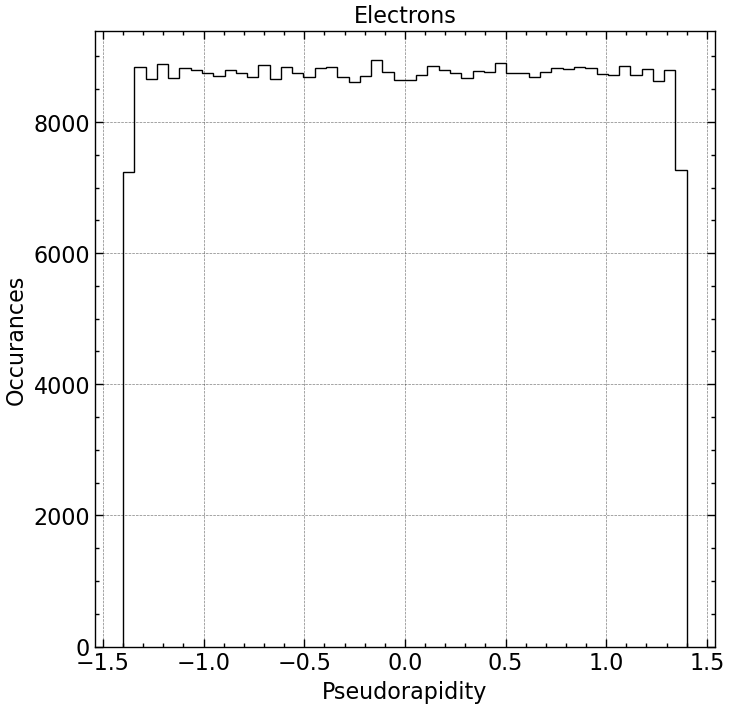

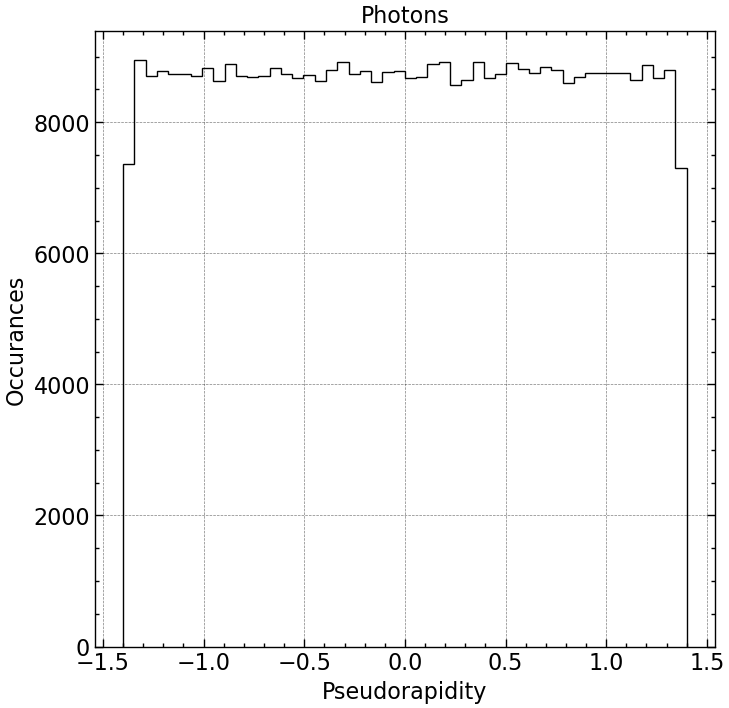

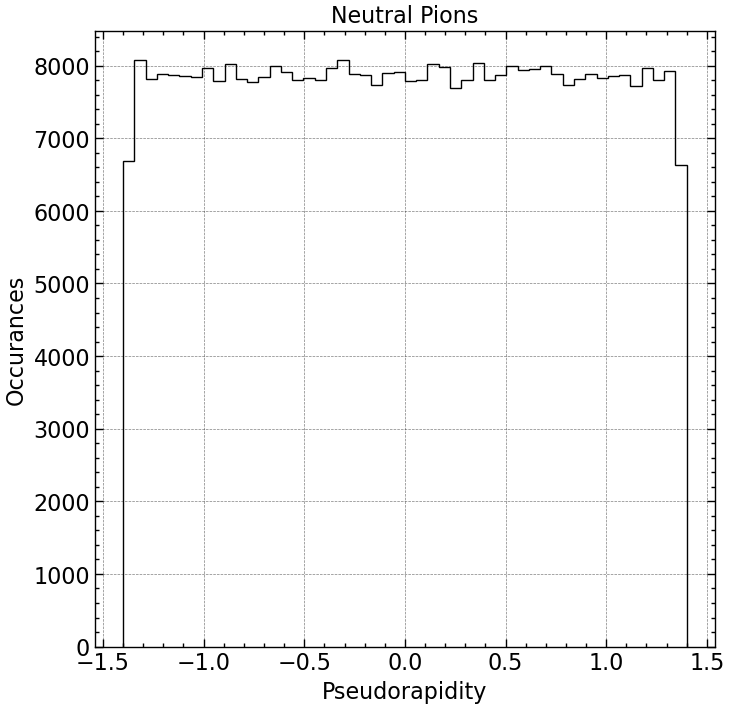

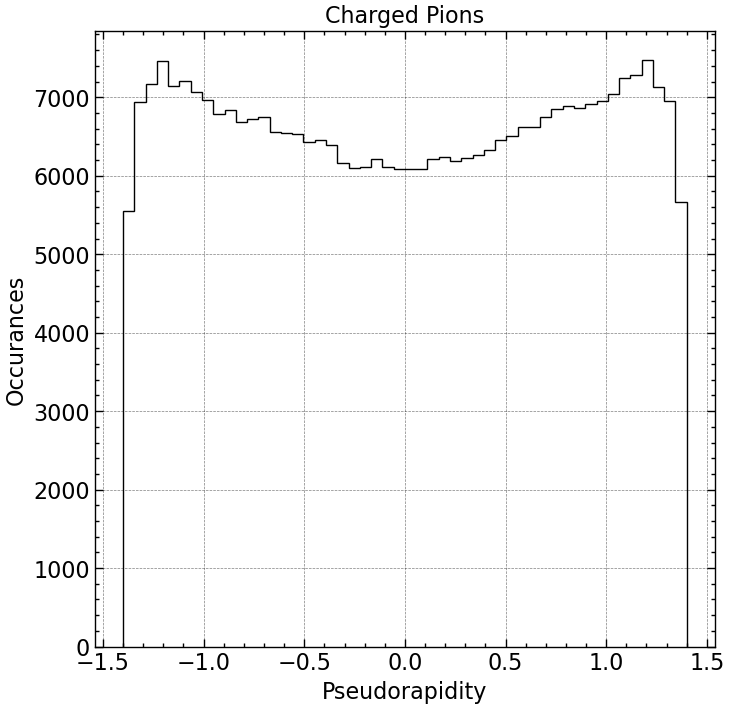

In [19]:
with plt.style.context(["science", "notebook", "grid"]):
    plt.figure(figsize=(8, 8))
    plt.hist(
        electrons.eta,
        bins=50,
        histtype="step",
        label="Electrons",
        color="k",
        density=False,
    )
    plt.xlabel("Pseudorapidity")
    plt.ylabel("Occurances")
    plt.title("Electrons")
    plt.show()


with plt.style.context(["science", "notebook", "grid"]):
    plt.figure(figsize=(8, 8))
    plt.hist(
        photons.eta,
        bins=50,
        histtype="step",
        label="Electrons",
        color="k",
        density=False,
    )
    plt.xlabel("Pseudorapidity")
    plt.ylabel("Occurances")
    plt.title("Photons")
    plt.show()

with plt.style.context(["science", "notebook", "grid"]):
    plt.figure(figsize=(8, 8))
    plt.hist(
        pi0.eta,
        bins=50,
        histtype="step",
        label="Electrons",
        color="k",
        density=False,
    )
    plt.xlabel("Pseudorapidity")
    plt.ylabel("Occurances")
    plt.title("Neutral Pions")
    plt.show()

with plt.style.context(["science", "notebook", "grid"]):
    plt.figure(figsize=(8, 8))
    plt.hist(
        pi_char.eta,
        bins=50,
        histtype="step",
        label="Electrons",
        color="k",
        density=False,
    )
    plt.xlabel("Pseudorapidity")
    plt.ylabel("Occurances")
    plt.title("Charged Pions")
    plt.show()

## 5. Energy Left in Given Layer / Total Energy Deposited in Calorimeters

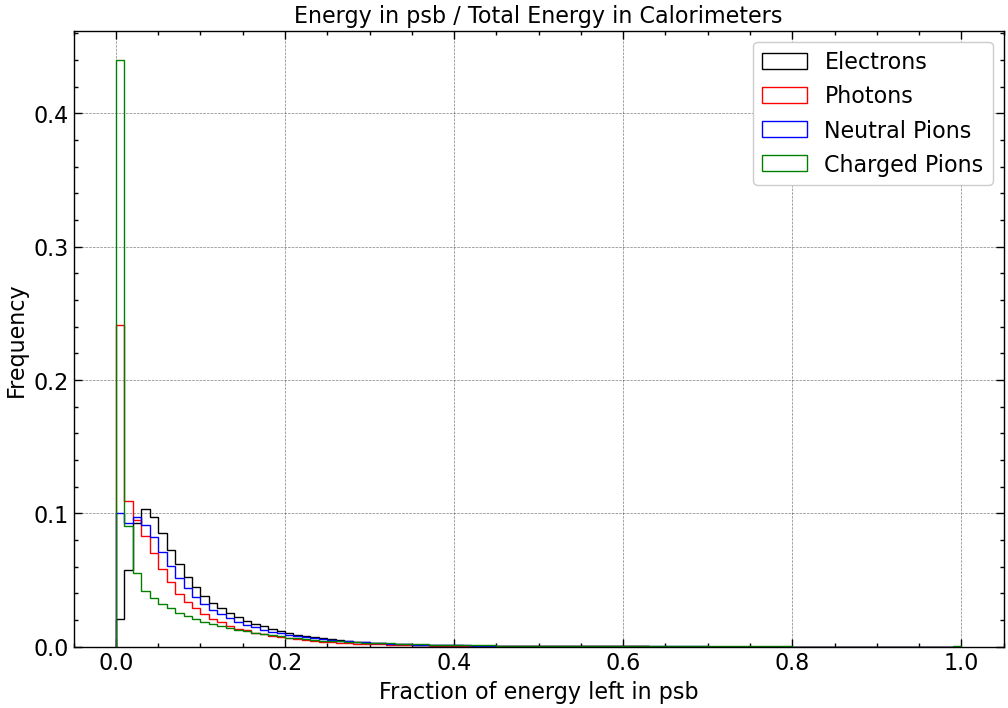

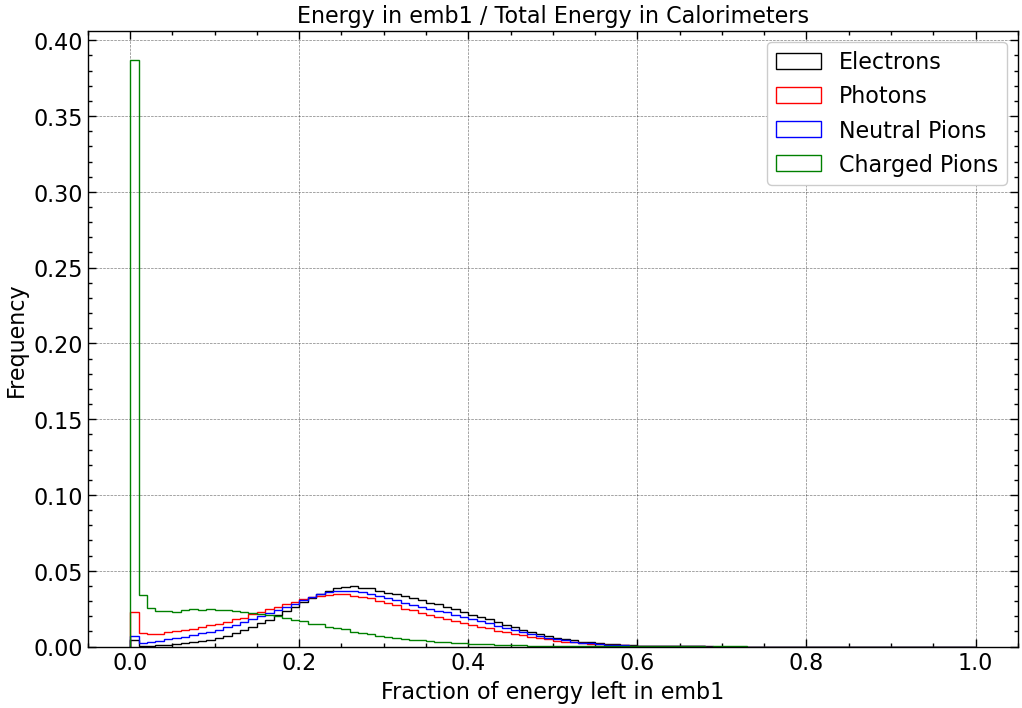

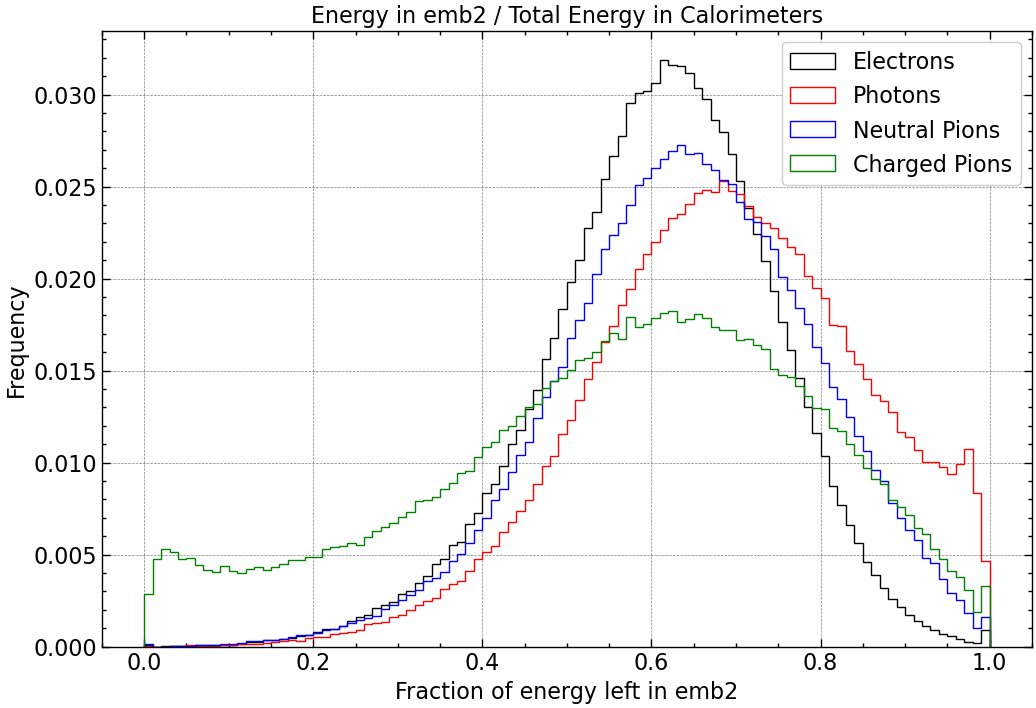

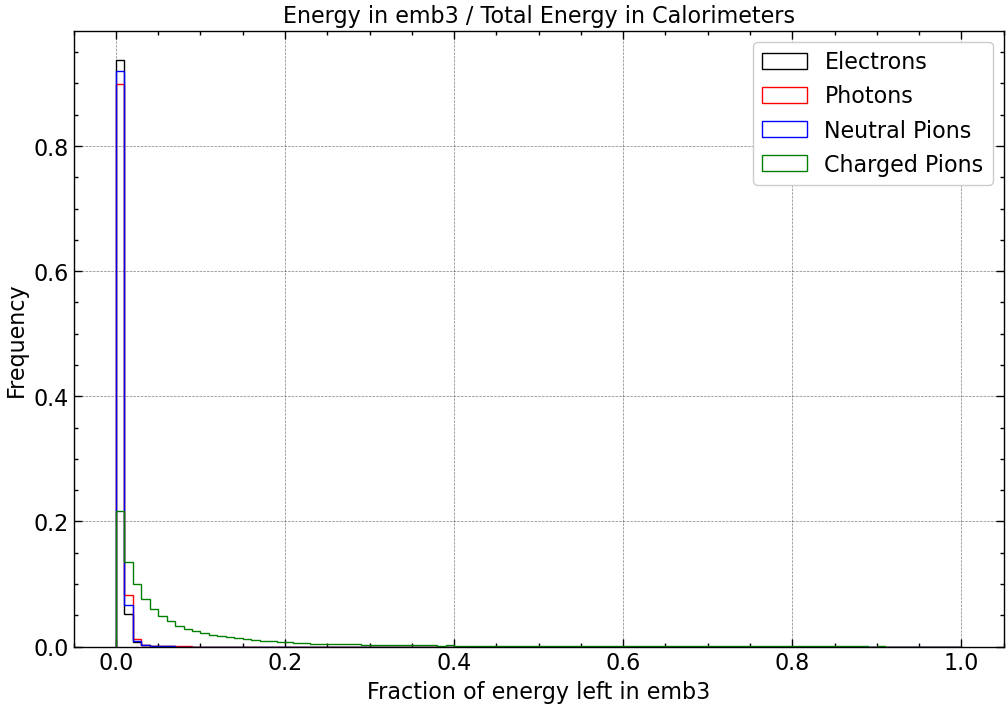

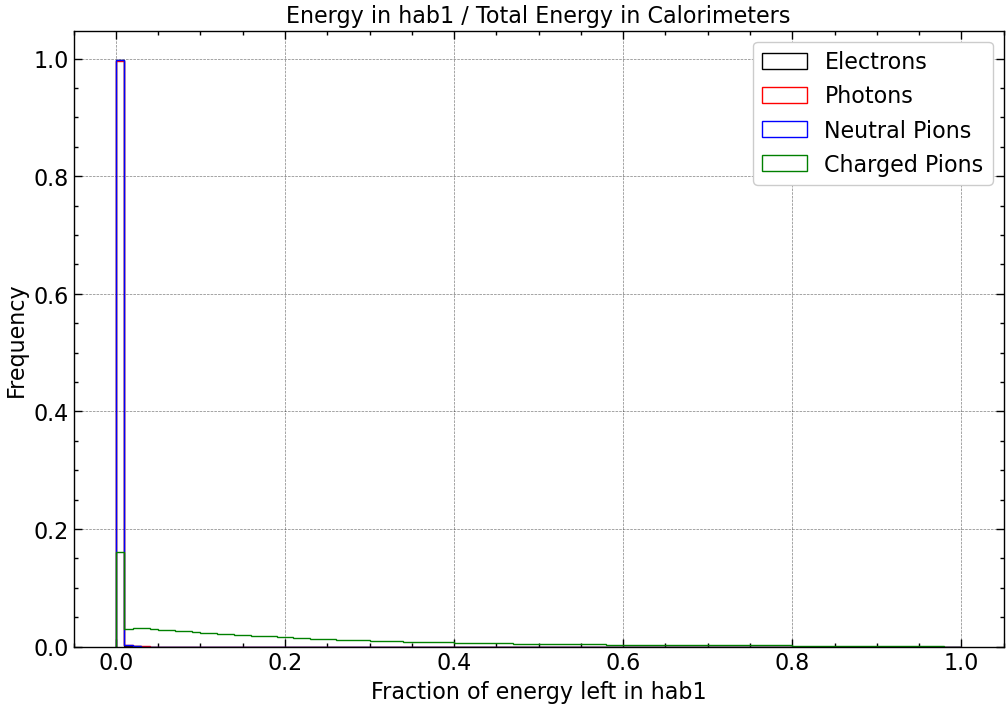

In [20]:
for layer in FIVE_LAYERS.layers:
    data1 = (
        np.sum(electrons.ldf[layer + "_cells"].values, axis=1)
        / electrons.tot_layers_et()
    )
    data2 = (
        np.sum(photons.ldf[layer + "_cells"].values, axis=1) / photons.tot_layers_et()
    )
    data3 = np.sum(pi0.ldf[layer + "_cells"].values, axis=1) / pi0.tot_layers_et()
    data4 = (
        np.sum(pi_char.ldf[layer + "_cells"].values, axis=1) / pi_char.tot_layers_et()
    )

    # Compute the min and max values for bin edges across all datasets
    min_value = min(np.min(data1), np.min(data2), np.min(data3), np.min(data4))
    max_value = max(np.max(data1), np.max(data2), np.max(data3), np.max(data4))

    # Define the number of bins
    num_bins = 100
    bin_edges = np.linspace(min_value, max_value, num_bins + 1)

    # Calculate histograms manually and normalize by the total number of occurrences
    hist1, _ = np.histogram(data1, bins=bin_edges)
    hist2, _ = np.histogram(data2, bins=bin_edges)
    hist3, _ = np.histogram(data3, bins=bin_edges)
    hist4, _ = np.histogram(data4, bins=bin_edges)

    total_occurrences1 = len(data1)
    total_occurrences2 = len(data2)
    total_occurrences3 = len(data3)
    total_occurrences4 = len(data4)

    hist_normalized1 = hist1 / total_occurrences1
    hist_normalized2 = hist2 / total_occurrences2
    hist_normalized3 = hist3 / total_occurrences3
    hist_normalized4 = hist4 / total_occurrences4

    with plt.style.context(["science", "notebook", "grid"]):
        plt.figure(figsize=(12, 8))
        plt.hist(
            bin_edges[:-1],
            bins=bin_edges,
            weights=hist_normalized1,
            histtype="step",
            label="Electrons",
            # linestyle="dashed",
            color="k",
        )
        plt.hist(
            bin_edges[:-1],
            bins=bin_edges,
            weights=hist_normalized2,
            histtype="step",
            label="Photons",
            # linestyle="dashed",
            color="r",
        )
        plt.hist(
            bin_edges[:-1],
            bins=bin_edges,
            weights=hist_normalized3,
            histtype="step",
            label="Neutral Pions",
            # linestyle="dashed",
            color="b",
        )
        plt.hist(
            bin_edges[:-1],
            bins=bin_edges,
            weights=hist_normalized4,
            histtype="step",
            label="Charged Pions",
            # linestyle="dashed",
            color="g",
        )
        # Set labels and title
        plt.xlabel(f"Fraction of energy left in {layer}")
        plt.ylabel("Frequency")
        plt.title(f"Energy in {layer} / Total Energy in Calorimeters")

        # Add legend
        plt.legend()

        # Show plot
        plt.show()

## 6. Example Event Plots

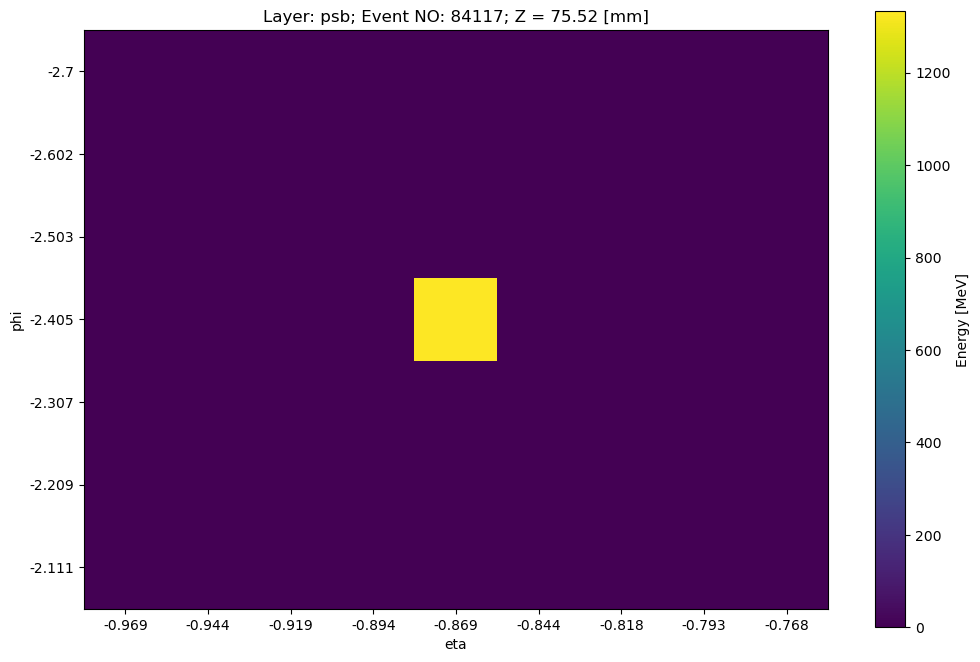

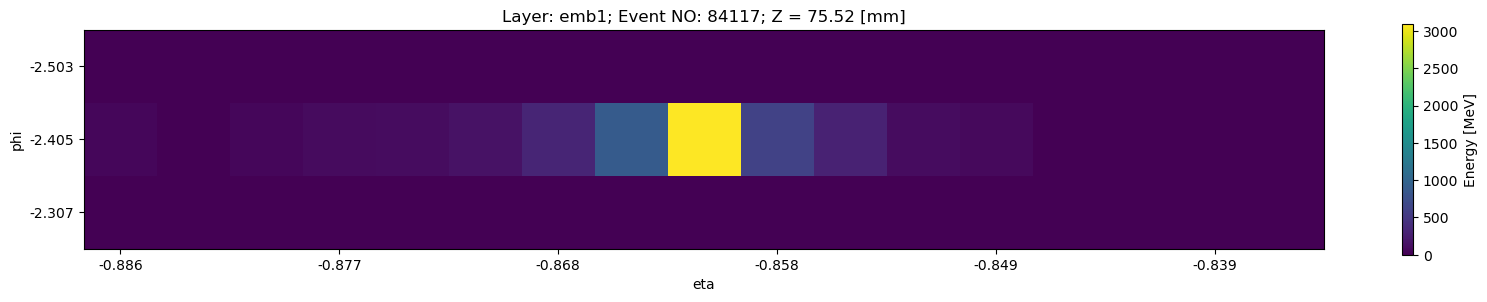

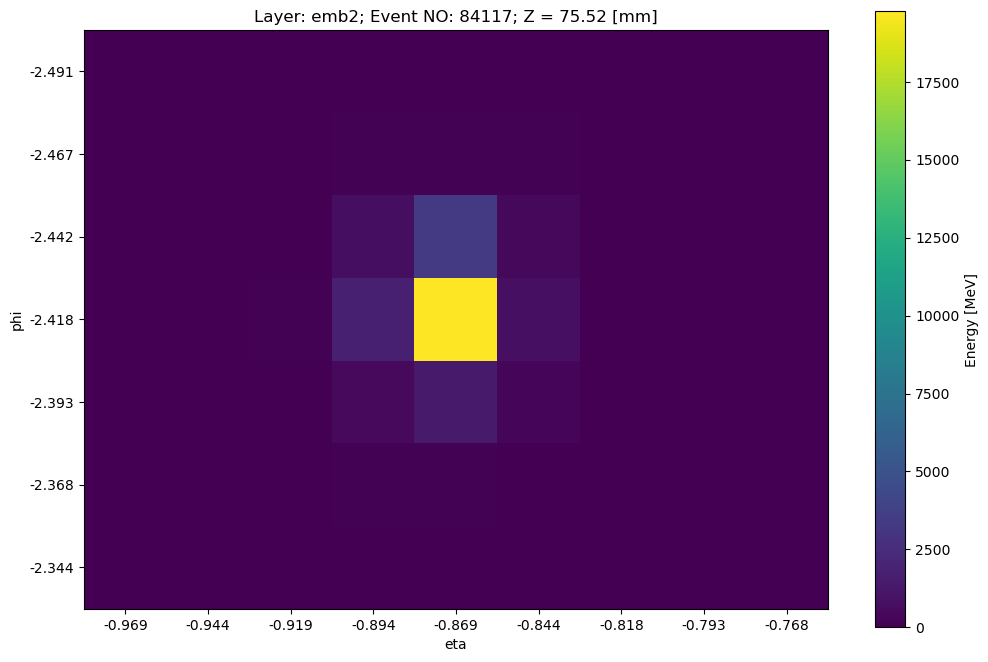

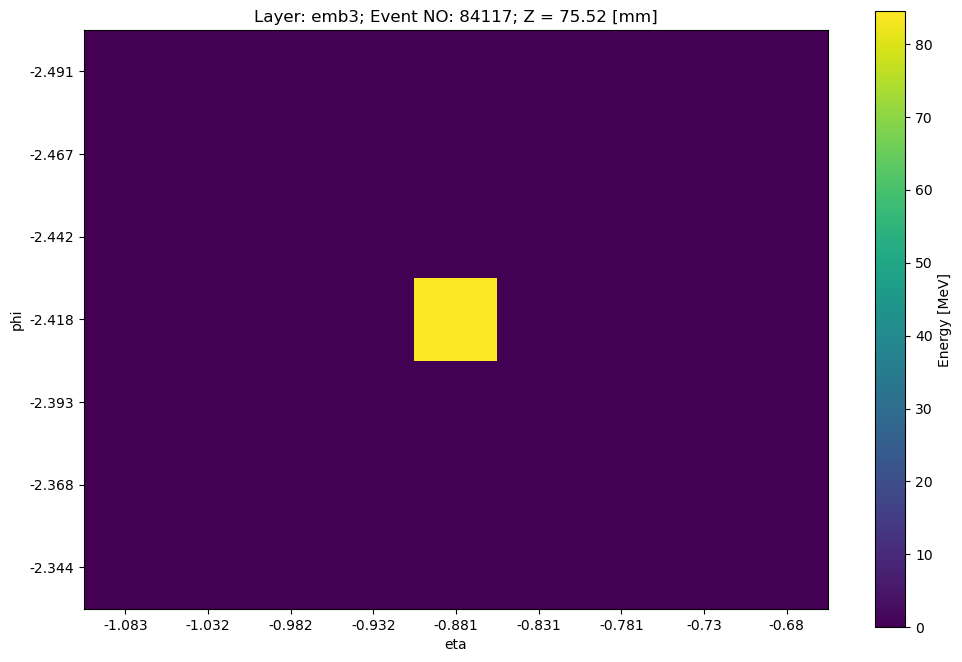

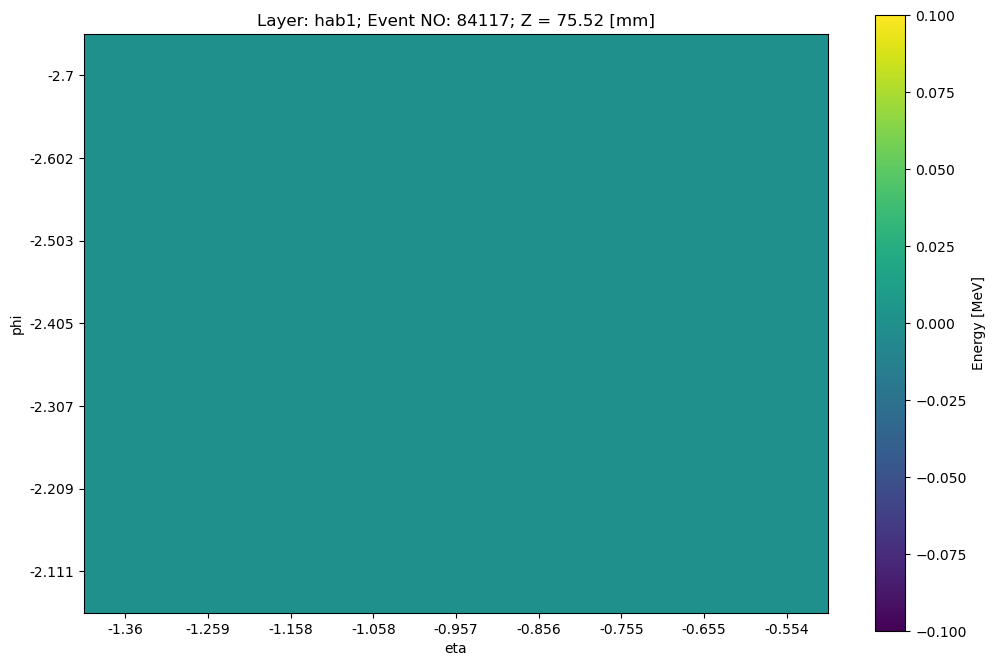

In [21]:
ix = 10
electrons.plot_psb(ix)
electrons.plot_emb1(ix)
electrons.plot_emb2(ix)
electrons.plot_emb3(ix)
electrons.plot_hab1(ix)

# 7. Uncorrelated Data

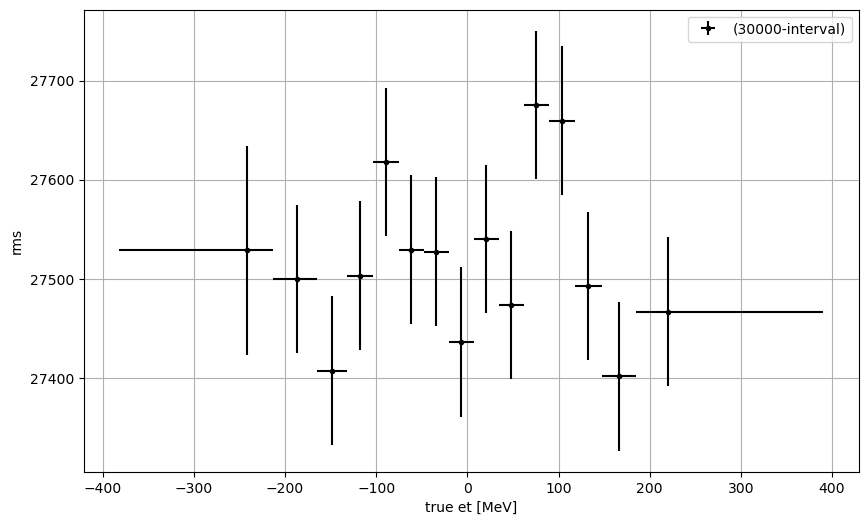

In [22]:
utils.plot_avg(
    x_values=electrons.z.values,
    y_values=electrons.et.values,
    interval=30000,
    xlabel="true et [MeV]",
    rms=False,
    abs=False,
    return_values=False,
    ylabel="rms",
    return_x_u=True,
    plot=True,
)

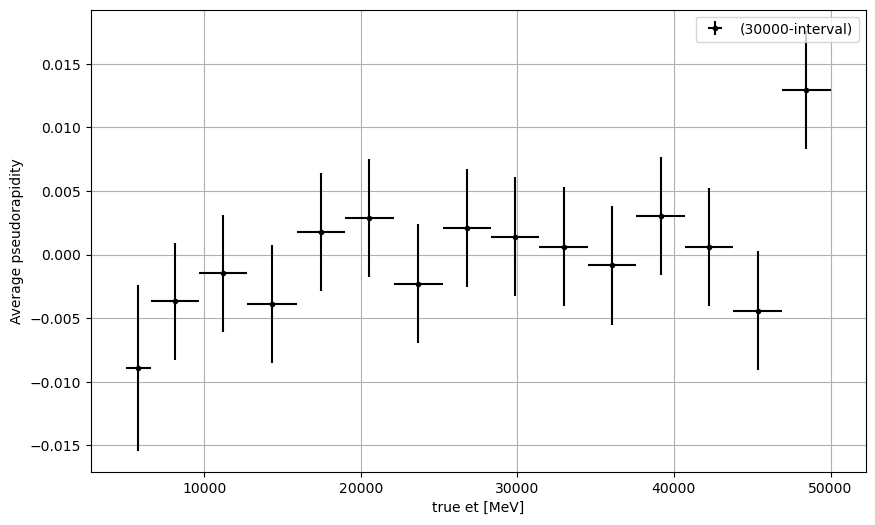

In [23]:
utils.plot_avg(
    x_values=electrons.et.values,
    y_values=electrons.eta.values,
    interval=30000,
    xlabel="true et [MeV]",
    rms=False,
    abs=False,
    return_values=False,
    ylabel="Average pseudorapidity",
    return_x_u=True,
    plot=True,
)